I developed this notebook to participate at this competition https://www.datachallenge.it/competitions/47
The goal of the competition was to to create an efficient system that curbs the threat of Malware using machine learning techniques to classify benign and malicious Apps. 

It has to be noted that the competition provided a train and a test dataset. The competition platform provided an evaluation of the quality of the forecasts. However, in order to facilitate the fruition of the present notebook, I will only use the train dataset and provided an evaluation of the forecast based on the information I already have.

In [1]:
#import all libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

#from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import statsmodels.api as sm


In [2]:
dataset = pd.read_csv("BG2023_train.csv")
dataset.head()

,Malware,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_NETWORK_STATE,ACCESS_WIFI_STATE,ACTIVITY_RECOGNITION,AUTHENTICATE_ACCOUNTS,BADGE_COUNT_READ,...,VIBRATE,WAKE_LOCK,WRITE,WRITE_CALENDAR,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,WRITE_SYNC_SETTINGS,WRITE_USE_APP_FEATURE_SURVEY,Recent
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,1,1,0,0,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [3]:
dataset['Malware'].value_counts()

1    5085
0    4915
Name: Malware, dtype: int64

<AxesSubplot:xlabel='Malware', ylabel='count'>

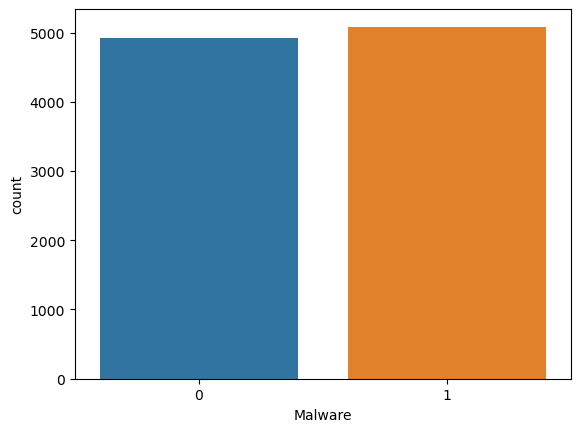

In [4]:
sns.countplot(data=dataset, x='Malware')

#1 Malware
#0 non Malware

In [5]:
dataset['num_access']=dataset.sum(axis=1)
dataset['num_access']=dataset['num_access']-1
dataset


,Malware,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_NETWORK_STATE,ACCESS_WIFI_STATE,ACTIVITY_RECOGNITION,AUTHENTICATE_ACCOUNTS,BADGE_COUNT_READ,...,WAKE_LOCK,WRITE,WRITE_CALENDAR,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,WRITE_SYNC_SETTINGS,WRITE_USE_APP_FEATURE_SURVEY,Recent,num_access
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,1,14
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,11
2,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,1,0,0,0,23
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,9
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,11
9996,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
9997,0,1,1,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,20
9998,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,14


<AxesSubplot:xlabel='num_access', ylabel='count'>

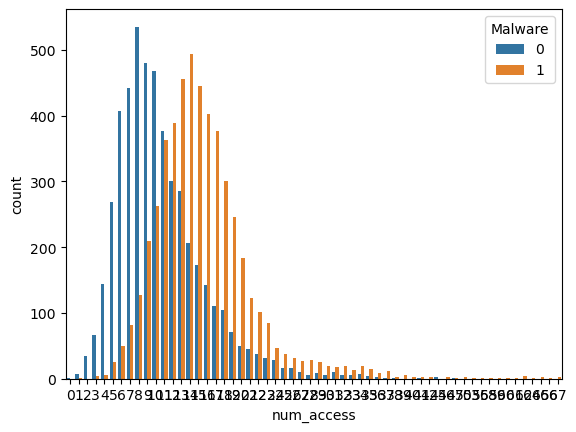

In [6]:
sns.countplot(data=dataset, x="num_access", hue="Malware")

In [7]:
X= dataset[['ACCESS_COARSE_LOCATION', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION',
       'ACCESS_NETWORK_STATE', 'ACCESS_WIFI_STATE', 'ACTIVITY_RECOGNITION',
       'AUTHENTICATE_ACCOUNTS', 'BADGE_COUNT_READ', 'BADGE_COUNT_WRITE',
       'BILLING', 'BIND_GET_INSTALL_REFERRER_SERVICE', 'BLUETOOTH',
       'BLUETOOTH_ADMIN', 'BROADCAST_BADGE', 'BROADCAST_STICKY', 'C2D_MESSAGE',
       'CALL_PHONE', 'CAMERA', 'CHANGE_BADGE', 'CHANGE_CONFIGURATION',
       'CHANGE_NETWORK_STATE', 'CHANGE_WIFI_STATE', 'CLEAR_APP_CACHE',
       'DISABLE_KEYGUARD', 'DOWNLOAD_WITHOUT_NOTIFICATION', 'FLASHLIGHT',
       'FOREGROUND_SERVICE', 'GET_ACCOUNTS', 'GET_TASKS', 'INSTALL_SHORTCUT',
       'INTERNET', 'KILL_BACKGROUND_PROCESSES', 'MANAGE_ACCOUNTS',
       'MODIFY_AUDIO_SETTINGS', 'MOUNT_UNMOUNT_FILESYSTEMS', 'NFC',
       'PROCESS_OUTGOING_CALLS', 'PROVIDER_INSERT_BADGE', 'READ',
       'READ_APP_BADGE', 'READ_CALENDAR', 'READ_CONTACTS',
       'READ_EXTERNAL_STORAGE', 'READ_GSERVICES', 'READ_LOGS',
       'READ_PHONE_STATE', 'READ_PROFILE', 'READ_SETTINGS', 'READ_SMS',
       'READ_SYNC_SETTINGS', 'RECEIVE', 'RECEIVE_BOOT_COMPLETED',
       'RECEIVE_SMS', 'RECEIVE_USER_PRESENT', 'RECORD_AUDIO',
       'REQUEST_INSTALL_PACKAGES', 'RESTART_PACKAGES', 'SEND_SMS', 'SET_ALARM',
       'SET_WALLPAPER', 'SET_WALLPAPER_HINTS', 'SYSTEM_ALERT_WINDOW',
       'UNINSTALL_SHORTCUT', 'UPDATE_BADGE', 'UPDATE_COUNT', 'UPDATE_SHORTCUT',
       'USE_CREDENTIALS', 'USE_FINGERPRINT', 'VIBRATE', 'WAKE_LOCK', 'WRITE',
       'WRITE_CALENDAR', 'WRITE_CONTACTS', 'WRITE_EXTERNAL_STORAGE',
       'WRITE_SETTINGS', 'WRITE_SYNC_SETTINGS', 'WRITE_USE_APP_FEATURE_SURVEY', 'num_access']]
y= dataset['Malware']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
scaler= StandardScaler()
scaler.fit(X_train)

scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

SVC_model= SVC()

SVC_model.fit(scaled_X_train, y_train)

SVC()

In [10]:
y_pred= SVC_model.predict(scaled_X_test)
y_pred


confusion_matrix(y_test, y_pred)

array([[1345,  111],
       [ 162, 1382]], dtype=int64)

In [11]:
np.mean(y_pred==y_test)

0.909